In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data = pd.read_csv("anomaly_data.csv")

In [3]:
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0,0,75.0,0.000000,75,75,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0,0,2655.0,2261.327486,4254,1056,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/7/2019 1:24,141,0,3,...,0.0,0,0,70.5,0.707107,71,70,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,4/9/2019 3:58,151,0,2,...,0.0,0,0,151.0,0.000000,151,151,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/9/2019 1:41,153,2,1,...,0.0,0,0,76.5,0.707107,77,76,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
data.shape

(625783, 86)

In [5]:
null_check = data.isnull().sum()

null_check.to_csv('null_count')
#no null data has been found

In [6]:
data['Label'].unique()

array(['Anomaly', 'Normal'], dtype=object)

In [7]:
data['Fwd_PSH_Flags'].unique()

array([0], dtype=int64)

In [8]:
data['Bwd_PSH_Flags'].unique()

array([0, 1], dtype=int64)

In [9]:
data['Fwd_URG_Flags'].unique()

array([0], dtype=int64)

In [10]:
data['Bwd_URG_Flags'].unique()

array([0, 1], dtype=int64)

In [11]:
data['FIN_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [12]:
data['RST_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [13]:
data['URG_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [14]:
data['CWE_Flag_Count'].unique()

array([0, 1], dtype=int64)

In [15]:
data['ECE_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [16]:
data['Down/Up_Ratio'].unique()

array([ 1,  2,  0,  3,  4,  5, 10,  7,  8,  6, 13, 12, 11,  9, 14],
      dtype=int64)

In [17]:
data['Fwd_Byts/b_Avg'].unique()

array([0], dtype=int64)

In [18]:
data['Fwd_Pkts/b_Avg'].unique()

array([0], dtype=int64)

In [19]:
data['Fwd_Blk_Rate_Avg'].unique()

array([0], dtype=int64)

In [20]:
data['Bwd_Byts/b_Avg'].unique()

array([0], dtype=int64)

In [21]:
data['Bwd_Pkts/b_Avg'].unique()

array([0], dtype=int64)

In [22]:
data['Bwd_Blk_Rate_Avg'].unique()

array([0], dtype=int64)

In [23]:
data['Init_Fwd_Win_Byts'].unique()

array([-1], dtype=int64)

In [24]:
data['Fwd_Seg_Size_Min'].unique()

array([0], dtype=int64)

In [25]:
print(data[data.Label=='Anomaly'].shape)
print(data[data.Label=='Normal'].shape)

(585710, 86)
(40073, 86)


In [26]:
temp_ignore_cols = set(['Flow_ID', 'Label', 'Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Byts/b_Avg', 
                        'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
                        'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min', 'Cat', 'Sub_Cat'])

In [27]:
cols = set(data.columns)

In [28]:
TRAIN_COLS = list(cols-temp_ignore_cols)
TG_COL = ["Label"]
print("Number of Features :", len(TRAIN_COLS))

Number of Features : 72


In [29]:
corr = data[TRAIN_COLS+TG_COL].corr()
corr

,Fwd_Header_Len,Fwd_Act_Data_Pkts,Dst_Port,Fwd_Pkt_Len_Min,Flow_Duration,Bwd_PSH_Flags,Idle_Std,Subflow_Bwd_Pkts,Bwd_IAT_Min,Active_Std,...,Fwd_IAT_Tot,Flow_IAT_Mean,Src_Port,TotLen_Fwd_Pkts,Fwd_Pkt_Len_Std,Fwd_Pkt_Len_Mean,Protocol,Bwd_Pkt_Len_Mean,Idle_Max,FIN_Flag_Cnt
Fwd_Header_Len,1.000000,0.827936,0.162724,0.081399,0.069897,-0.019750,0.060148,-0.056346,-0.085040,0.249763,...,0.178414,-0.093856,0.054848,0.418706,0.138883,0.120772,0.095452,-0.062332,-0.004303,-0.000989
Fwd_Act_Data_Pkts,0.827936,1.000000,-0.018829,-0.011121,-0.002837,-0.038373,0.016131,-0.119192,-0.065568,0.058703,...,0.057717,-0.073373,0.193127,0.208176,0.046652,0.002517,0.336095,-0.118661,-0.030075,-0.006848
Dst_Port,0.162724,-0.018829,1.000000,0.508410,-0.063070,0.028314,0.003281,-0.094940,-0.129208,0.005157,...,0.014569,-0.125565,-0.598295,0.334806,0.151022,0.535553,-0.277742,0.340004,-0.079671,0.007702
Fwd_Pkt_Len_Min,0.081399,-0.011121,0.508410,1.000000,-0.060544,-0.032219,-0.001439,-0.223470,-0.109229,-0.005633,...,-0.000384,-0.100272,-0.414633,0.647279,-0.048177,0.975215,0.023205,0.612924,-0.069088,-0.011715
Flow_Duration,0.069897,-0.002837,-0.063070,-0.060544,1.000000,0.054156,0.732773,0.215306,0.633643,0.337718,...,0.715144,0.734407,-0.151521,0.089187,0.009656,-0.054266,-0.086556,-0.110422,0.956640,0.002827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fwd_Pkt_Len_Mean,0.120772,0.002517,0.535553,0.975215,-0.054266,-0.036469,0.005051,-0.235496,-0.113749,0.002016,...,0.013683,-0.105299,-0.428869,0.719441,0.164148,1.000000,0.032943,0.646469,-0.067732,-0.012197
Protocol,0.095452,0.336095,-0.277742,0.023205,-0.086556,-0.121583,-0.012169,-0.197330,-0.141059,0.001321,...,0.003143,-0.153144,0.463515,0.120057,0.051228,0.032943,1.000000,-0.223239,-0.104093,-0.016957
Bwd_Pkt_Len_Mean,-0.062332,-0.118661,0.340004,0.612924,-0.110422,-0.019765,-0.019327,-0.007752,-0.163644,-0.004781,...,-0.016194,-0.172411,-0.236695,0.454332,0.191518,0.646469,-0.223239,1.000000,-0.127175,-0.018039
Idle_Max,-0.004303,-0.030075,-0.079671,-0.069088,0.956640,0.050898,0.721140,0.143909,0.725139,0.195263,...,0.600942,0.838602,-0.171715,0.007784,-0.004814,-0.067732,-0.104093,-0.127175,1.000000,0.002709


In [30]:
corr.to_csv('correlation_matrix')

In [31]:
print(cols)

{'Fwd_Header_Len', 'Fwd_Pkt_Len_Min', 'Bwd_Blk_Rate_Avg', 'Idle_Std', 'Subflow_Bwd_Pkts', 'Bwd_IAT_Min', 'Active_Std', 'Bwd_IAT_Max', 'Pkt_Len_Var', 'Subflow_Fwd_Byts', 'Fwd_IAT_Std', 'Fwd_Pkts/b_Avg', 'Idle_Mean', 'Pkt_Len_Min', 'Fwd_PSH_Flags', 'Fwd_IAT_Min', 'Dst_IP', 'Fwd_Byts/b_Avg', 'Fwd_IAT_Max', 'SYN_Flag_Cnt', 'ECE_Flag_Cnt', 'Bwd_Byts/b_Avg', 'Flow_IAT_Std', 'Label', 'Fwd_Seg_Size_Avg', 'Flow_Pkts/s', 'Pkt_Len_Std', 'Pkt_Size_Avg', 'Fwd_Pkt_Len_Max', 'Subflow_Bwd_Byts', 'Active_Mean', 'Pkt_Len_Max', 'Active_Min', 'Src_IP', 'Fwd_Seg_Size_Min', 'Flow_Byts/s', 'Bwd_Pkt_Len_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Std', 'Sub_Cat', 'Bwd_Header_Len', 'Fwd_IAT_Tot', 'Timestamp', 'Fwd_Pkt_Len_Std', 'Fwd_Pkt_Len_Mean', 'FIN_Flag_Cnt', 'Bwd_Pkt_Len_Max', 'Fwd_Act_Data_Pkts', 'Dst_Port', 'Flow_Duration', 'Bwd_PSH_Flags', 'Bwd_Pkts/b_Avg', 'Tot_Bwd_Pkts', 'Init_Fwd_Win_Byts', 'Idle_Min', 'Active_Max', 'Bwd_URG_Flags', 'URG_Flag_Cnt', 'Pkt_Len_Mean', 'Subflow_Fwd_Pkts', 'Cat', 'Fwd_IAT_Mean', 'Bwd_I

In [32]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [33]:
data['Src_IP']= label_encoder.fit_transform(data['Src_IP'])

In [34]:
data['Dst_IP']= label_encoder.fit_transform(data['Dst_IP'])

In [35]:
data['Timestamp']= label_encoder.fit_transform(data['Timestamp'])

In [36]:
data['Label']= label_encoder.fit_transform(data['Label'])

In [37]:
data.head()
data.shape


(625783, 86)

In [38]:
train_data = data[TRAIN_COLS+TG_COL]


In [39]:
train_data.head()
train_data.shape

(625783, 73)

In [40]:
print(train_data[np.isfinite(train_data)])

        Fwd_Header_Len  Fwd_Act_Data_Pkts  Dst_Port  Fwd_Pkt_Len_Min  \
0                    8                  1     10101              982   
1                   20                  0       554                0   
2                    0                  0      9020                0   
3                    0                  0      9020                0   
4                   16                  2      1900              434   
...                ...                ...       ...              ...   
625778               8                  1      8043               18   
625779               0                  0       554                0   
625780              32                  0      9020                0   
625781              64                  2     49784             1388   
625782              16                  2     10101             1430   

        Flow_Duration  Bwd_PSH_Flags     Idle_Std  Subflow_Bwd_Pkts  \
0                  75              0     0.000000               

In [41]:
import numpy as np


train_data= train_data[np.isfinite(train_data).all(1)]
# train_label = data['Label'] 
# train_label = train_label[np.isfinite(train_label).all(1)]
train_data.shape



(625415, 73)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaler.transform(train_data)

array([[2.08768267e-03, 5.37634409e-03, 1.54518058e-01, ...,
        7.50202555e-04, 0.00000000e+00, 0.00000000e+00],
       [5.21920668e-03, 0.00000000e+00, 8.47470591e-03, ...,
        4.25514889e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.37981674e-01, ...,
        7.10191752e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.35073069e-03, 0.00000000e+00, 1.37981674e-01, ...,
        7.70207956e-04, 0.00000000e+00, 0.00000000e+00],
       [1.67014614e-02, 1.07526882e-02, 7.61560937e-01, ...,
        1.25033759e-03, 0.00000000e+00, 1.00000000e+00],
       [4.17536534e-03, 1.07526882e-02, 1.54518058e-01, ...,
        1.22032949e-03, 0.00000000e+00, 0.00000000e+00]])

In [43]:
print(train_data.shape)
print(data['Label'].shape)

(625415, 73)
(625783,)


In [44]:
from sklearn.model_selection import train_test_split


y = train_data['Label']
X = train_data.drop(columns=['Label'])
# X = train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
from sklearn.metrics import accuracy_score

Y_pred = regressor.predict(X_test)
Y_pred = np.where(Y_pred >=0.5, 1, 0)
print(accuracy_score(y_test, Y_pred))

0.9999616255420393


In [47]:
import math
 
MSE = np.square(np.subtract(y_test, Y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.006194712096682243


In [48]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_auc_score

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, Y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, Y_pred)

RMSE = math.sqrt(MSE)


# R-squared scores
r2 = r2_score(y_test, Y_pred)

F1 = f1_score(y_test, Y_pred)

roc_auc = roc_auc_score(y_test, Y_pred)



# Print metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared scores:', r2)

print("Root Mean Square Error:", RMSE)
print("F1 score:", F1)
print("ROC Auc score:", roc_auc)


Mean Absolute Error: 3.8374457960781306e-05
Mean Squared Error: 3.8374457960781306e-05
R-squared scores: 0.9993633901581129
Root Mean Square Error: 0.006194712096682243
F1 score: 0.9997021149836164
ROC Auc score: 0.9997022036926742


In [49]:
y_pred = np.where(Y_pred >=0.5, 1, 0)
y_pred = pd.DataFrame(y_pred)

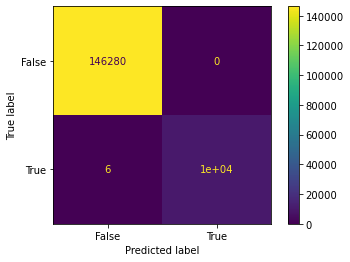

In [50]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

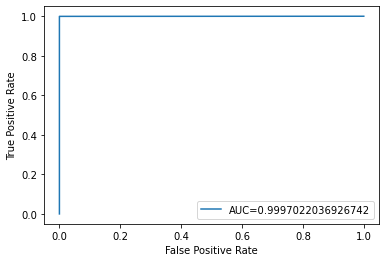

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
auc = metrics.roc_auc_score(y_test, Y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  0.9994044073853484
